In [41]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# SciEval

In [2]:
# uncomment to download
# dataset = datasets.load_dataset("OpenDFM/SciEval")
# dataset.save_to_disk("./SciEval")

In [18]:
df_scieval = (
    pl.read_ipc_stream("SciEval/test/data-00000-of-00001.arrow")
    .filter(pl.col("category") == "physics")
    .with_columns(
        pl.col("answer").map_elements(lambda x: len(x), return_dtype=pl.Int32)
    )
)
agg_cols = [c for c in df_scieval.columns if c != "question"]

df_scieval = (
    df_scieval
    .group_by("question", maintain_order=True)
    .agg([pl.col(c).drop_nulls().first().alias(c) for c in agg_cols])
)

In [19]:
train_texts = df_scieval["question"].to_list()
train_labels = df_scieval["topic"].to_list()

le = LabelEncoder()
y_train = le.fit_transform(train_labels)

emb_model = SentenceTransformer("all-MiniLM-L6-v2")  # small, accurate, CPU-friendly

def embed(texts):
    return emb_model.encode(texts, normalize_embeddings=True, batch_size=64, show_progress_bar=False)

X_train = embed(train_texts)

In [22]:
log_reg = LogisticRegression(max_iter=5000, C=8, class_weight="balanced", penalty="l2", solver="saga")
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,8
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,5000
,multi_class,'deprecated'


# MMLU (college physics)

In [23]:
# uncomment to download
# dataset = datasets.load_dataset("cais/mmlu", "college_physics")
# dataset.save_to_disk("./MMLU_college_physics")

In [24]:
df_mmlu_college_physics = pl.read_ipc_stream("MMLU_college_physics/test/data-00000-of-00001.arrow")

In [27]:
questions = df_mmlu_college_physics["question"].to_list()
X = embed(questions)
topics = le.inverse_transform(log_reg.predict(X))

In [29]:
df_mmlu_college_physics = df_mmlu_college_physics.with_columns(
    pl.Series("predicted_topic", topics)
)

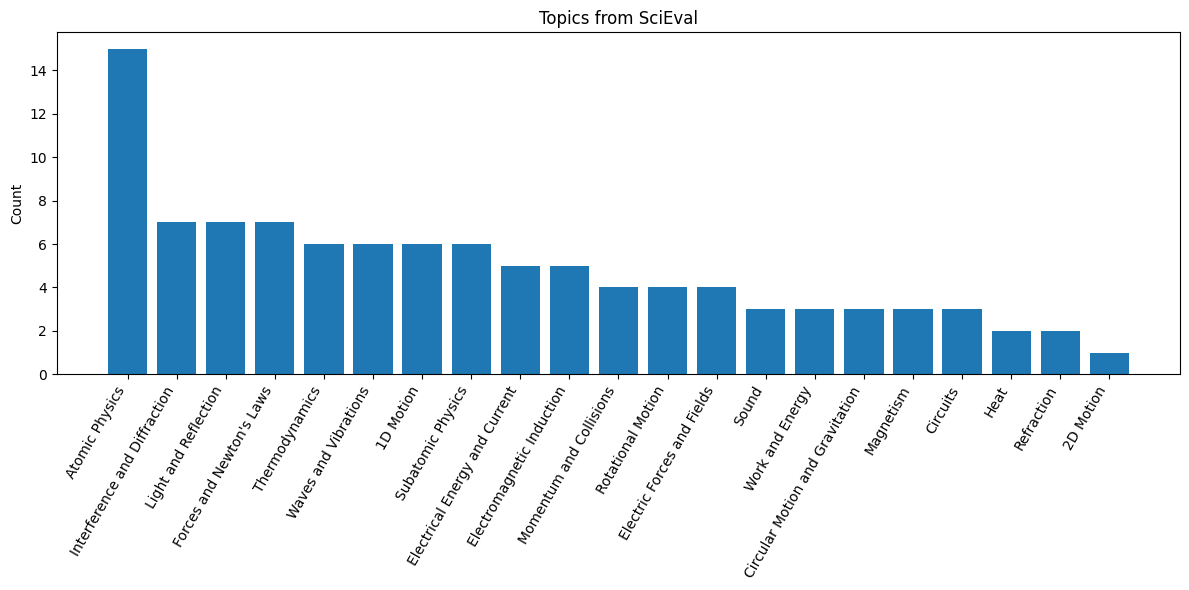

In [42]:
topics = df_mmlu_college_physics.group_by("predicted_topic").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["predicted_topic"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title(f"Topics from SciEval")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()

# MMLU (conceptual physics)

In [31]:
# uncomment to download
# dataset = datasets.load_dataset("cais/mmlu", "conceptual_physics")
# dataset.save_to_disk("./MMLU_conceptual_physics")

In [32]:
df_mmlu_conceptual_physics = pl.read_ipc_stream("MMLU_conceptual_physics/test/data-00000-of-00001.arrow")

In [33]:
questions = df_mmlu_conceptual_physics["question"].to_list()
X = embed(questions)
topics = le.inverse_transform(log_reg.predict(X))

In [34]:
df_mmlu_conceptual_physics = df_mmlu_conceptual_physics.with_columns(
    pl.Series("predicted_topic", topics)
)

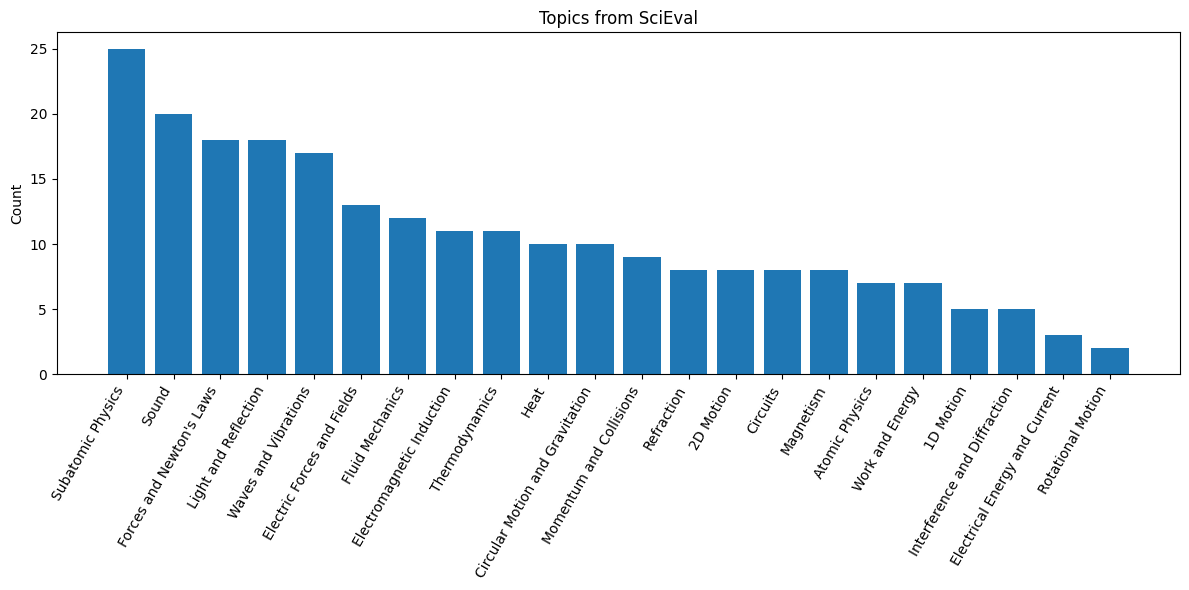

In [43]:
topics = df_mmlu_conceptual_physics.group_by("predicted_topic").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["predicted_topic"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title(f"Topics from SciEval")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()

# MMLU (high school physics)

In [36]:
# uncomment to download
# dataset = datasets.load_dataset("cais/mmlu", "high_school_physics")
# dataset.save_to_disk("./MMLU_high_school_physics")

In [37]:
df_mmlu_high_school_physics = pl.read_ipc_stream("MMLU_high_school_physics/test/data-00000-of-00001.arrow")

In [38]:
questions = df_mmlu_high_school_physics["question"].to_list()
X = embed(questions)
topics = le.inverse_transform(log_reg.predict(X))

In [39]:
df_mmlu_high_school_physics = df_mmlu_high_school_physics.with_columns(
    pl.Series("predicted_topic", topics)
)

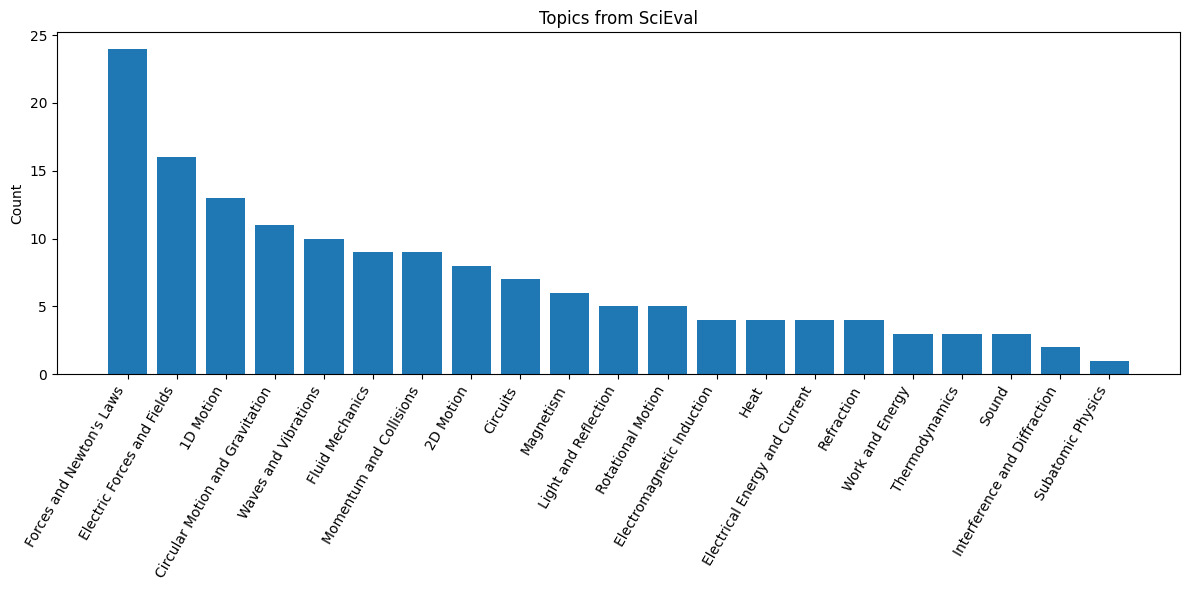

In [44]:
topics = df_mmlu_high_school_physics.group_by("predicted_topic").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["predicted_topic"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title(f"Topics from SciEval")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()